#Imports

In [4]:
  import numpy as np
  import matplotlib.pyplot as plt
  %matplotlib inline
  import keras
  from keras.models import Sequential
  from keras.layers import Dense, Dropout
  from sklearn.metrics import confusion_matrix
  import seaborn as sns

  np.random.seed(0)

# Data

In [5]:
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [7]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


#Visualise Examples

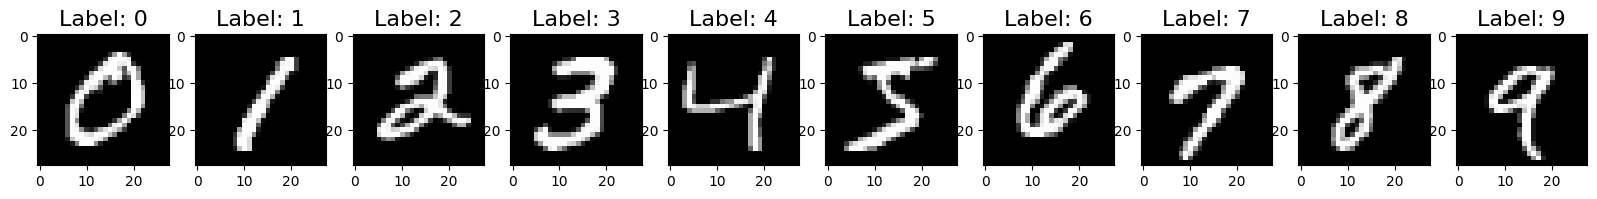

In [10]:
num_classes = 10
f, ax = plt.subplots(1, num_classes, figsize = (20, 20))

for i in range (0, num_classes):
  sample = x_train[y_train == i][0]
  ax[i].imshow(sample, cmap = 'gray')
  ax[i].set_title("Label: {}".format(i), fontsize = 16)

In [11]:
for i in range(10):
  print(y_train[i])

5
0
4
1
9
2
1
3
1
4


In [12]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [13]:
for i in range(10):
  print(y_train[i])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


# Prepare Data

In [14]:
# Normalise Data
x_train = x_train / 255.0
x_test = x_test / 255.0

In [18]:
# Reshape Data
x_train = x_train.reshape(x_train.shape[0], -1)
x_test = x_test.reshape(x_test.shape[0], -1)
print(x_train.shape)

(60000, 784)


# Creating Model - Fully Connected Neural Network

In [20]:
model = Sequential()

model.add(Dense(units = 128, input_shape = (784,), activation = 'relu'))
model.add(Dense(units = 128, activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(units = 10, activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 118,282 (462.04 KB)

 Trainable params: 118,282 (462.04 KB)

 Non-trainable params: 0 (0.00 B)

# Train

In [23]:
batch_size = 512
epochs = 10
model.fit(x = x_train, y = y_train, batch_size = batch_size, epochs = epochs)

Epoch 1/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.7018 - loss: 1.0317
Epoch 2/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.9273 - loss: 0.2451
Epoch 3/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9488 - loss: 0.1788
Epoch 4/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9589 - loss: 0.1424
Epoch 5/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9684 - loss: 0.1108
Epoch 6/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9715 - loss: 0.0958
Epoch 7/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9758 - loss: 0.0836
Epoch 8/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9781 - loss: 0.0734
Epoch 9/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9812 - loss: 0.0610
Epoch 10/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9842 - loss: 0.0535


# Evaluate

In [24]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print("Test Loss: {}, Test Accuracy: {}".format(test_loss, test_accuracy))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9718 - loss: 0.0902
Test Loss: 0.07867278158664703, Test Accuracy: 0.9753999710083008


In [25]:
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis = 1)
print(y_pred)
print(y_pred_classes)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
[[2.9177729e-06 5.5486207e-06 1.0123908e-04 ... 9.9951464e-01
  9.8563487e-07 2.8279741e-05]
 [3.2569570e-08 7.8926503e-04 9.9918574e-01 ... 1.0144283e-09
  2.4561346e-06 3.5887140e-11]
 [1.3717431e-06 9.9787503e-01 4.4386979e-04 ... 1.2728755e-03
  1.2515511e-04 1.3879107e-05]
 ...
 [2.5232774e-10 3.9855894e-10 3.7850261e-11 ... 1.1818066e-06
  6.4823342e-07 2.1182121e-05]
 [4.5465839e-08 1.0833170e-07 5.9053904e-09 ... 9.2142336e-08
  1.5909782e-05 2.1266808e-09]
 [2.2653762e-07 2.0983447e-10 3.7543225e-07 ... 8.9948752e-12
  4.4121055e-08 2.0485211e-10]]
[7 2 1 ... 4 5 6]


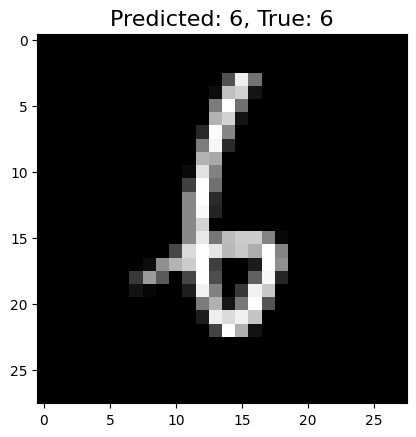

In [27]:
# Single Example
random_idx = np.random.choice(len(x_test))
x_sample = x_test[random_idx]
y_true = np.argmax(y_test, axis = 1)
y_sample_true = y_true[random_idx]
y_sample_pred_class = y_pred_classes[random_idx]

plt.title("Predicted: {}, True: {}".format(y_sample_pred_class, y_sample_true), fontsize = 16)
plt.imshow(x_sample.reshape(28, 28), cmap = 'gray')

# Confusion Matrix

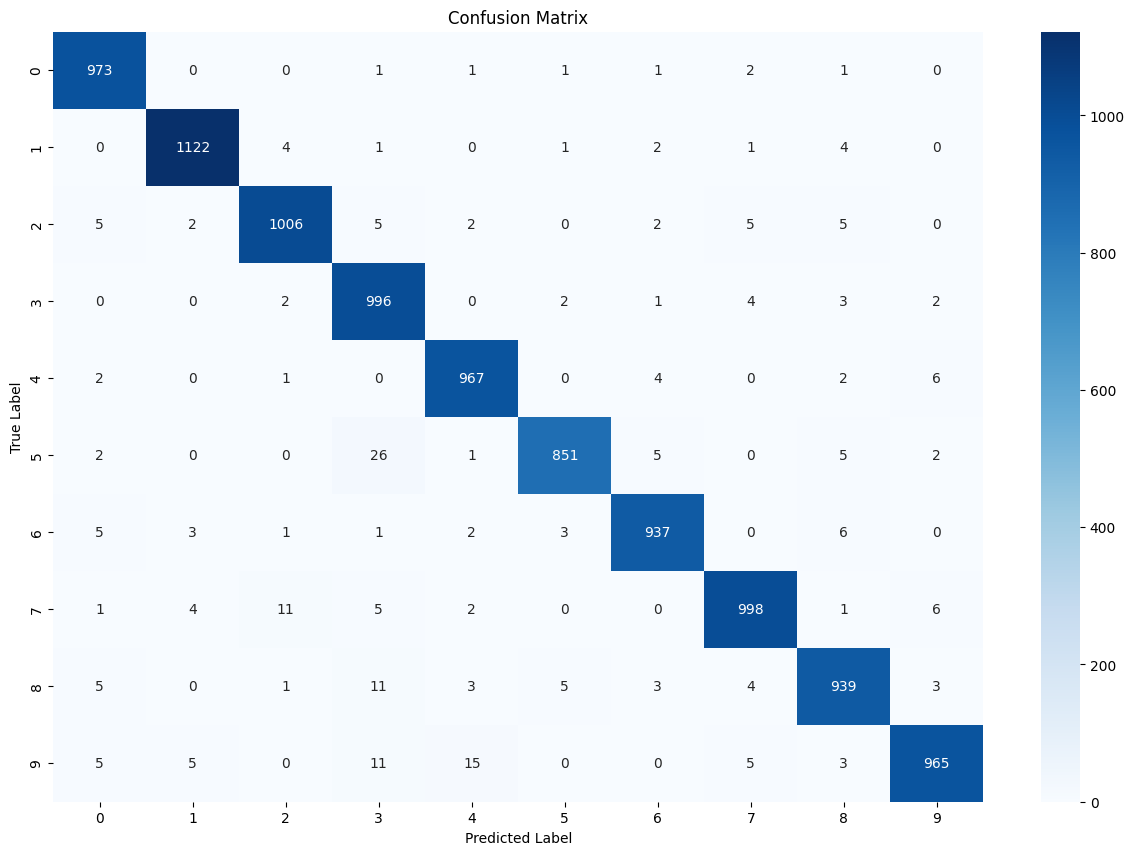

In [30]:
confusion_mtx = confusion_matrix(y_true, y_pred_classes)

# Plot
fig, ax = plt.subplots(figsize = (15, 10))
ax = sns.heatmap(confusion_mtx, annot = True, fmt = 'd', ax = ax, cmap = 'Blues')
ax.set_xlabel("Predicted Label")
ax.set_ylabel("True Label")
ax.set_title("Confusion Matrix");

 # Investogate Errors

In [34]:
errors = (y_pred_classes - y_true != 0)
y_pred_classes_errors = y_pred_classes[errors]
y_pred_errors = y_pred[errors]
y_true_errors = y_true[errors]
x_test_errors = x_test[errors]

In [35]:
y_pred_errors_probability = np.max(y_pred_errors, axis = 1)
true_probability_errors = np.diagonal(np.take(y_pred_errors, y_true_errors, axis = 1))
diff_errors_pred_true = y_pred_errors_probability - true_probability_errors

# Get list of indices of sorted differences
sorted_idx_diff_errors = np.argsort(diff_errors_pred_true)
top_idx_diff_errors = sorted_idx_diff_errors[-5:] # 5 last ones

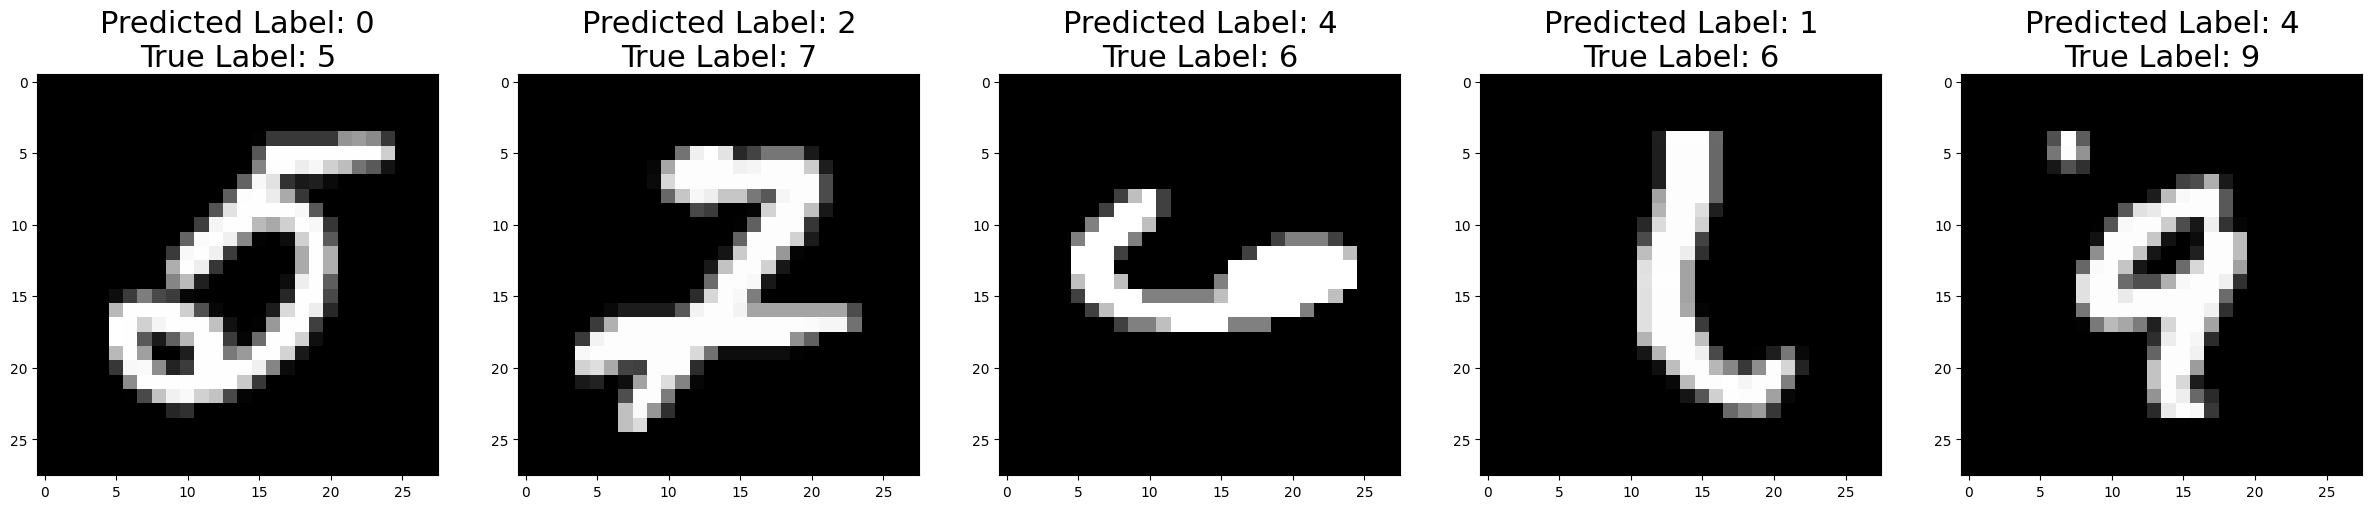

In [36]:
# Show Top Errors
num = len(top_idx_diff_errors)
f, ax = plt.subplots(1, num, figsize=(30, 30))

for i in range(0, num):
  idx = top_idx_diff_errors[i]
  sample = x_test_errors[idx].reshape(28, 28)
  y_t = y_true_errors[idx]
  y_p = y_pred_classes_errors[idx]
  ax[i].imshow(sample, cmap = 'gray')
  ax[i].set_title("Predicted Label: {}\nTrue Label: {}".format(y_p, y_t), fontsize = 22)
